## HW2 | KNN Graph Instruction

#### 1. Fill in all code (under # put your code here)

#### 2. Must use Pandas or Numpy if there is an instruction 

#### 3. Generate the plot that is exactly the same as the table right after each code block

#### 4. Answer the question at the end of this jupyter notebook


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Swiss Banknote Dataset

Six variables measured on 100 genuine and 100 counterfeit old Swiss 1000-franc
bank notes. The data stem from Flury and Riedwyl (1988). The columns correspond
to the following one label and six variables:

0. Conterfeit - 0: genuine bank notes、1: genuine bank notes (Labels)


1. Length - Length of the bank note


2. Left - Height of the bank note, measured on the left


3. Right - Height of the bank note, measured on the right


4. Bottom - Distance of inner frame to the lower border


5. Top - Distance of inner frame to the upper border


6. Diagonal - Length of the diagonal



More details: [Kaggle | Swiss banknote conterfeit detection](https://www.kaggle.com/chrizzles/swiss-banknote-conterfeit-detection)

In [2]:
# Use [Pandas] to import data | banknotes.csv
# Put your code here 

bank = pd.read_csv('D:/banknotes.csv')
label = bank.conterfeit

bank.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8


In [3]:
# Use [Numpy function] to stack the following columns
# The 5-th column "Bottom" as X, the 6-th Bottom "Top" as Y
# Put your code here

data_xy=np.array(bank[['Bottom','Top']])
data_xy

array([[ 9. ,  9.7],
       [ 8.1,  9.5],
       [ 8.7,  9.6],
       [ 7.5, 10.4],
       [10.4,  7.7],
       [ 9. , 10.1],
       [ 7.9,  9.6],
       [ 7.2, 10.7],
       [ 8.2, 11. ],
       [ 9.2, 10. ],
       [ 7.9, 11.7],
       [ 7.7, 10.5],
       [ 7.9, 10.8],
       [ 7.7, 10.9],
       [ 7.7, 10.8],
       [ 9.3,  8.5],
       [ 8.2,  9.8],
       [ 9. ,  9. ],
       [ 7.4, 11.5],
       [ 8.6, 10. ],
       [ 8.4, 10. ],
       [ 8.1, 10.3],
       [ 8.4, 10.8],
       [ 8.7, 10. ],
       [ 7.4, 10.8],
       [ 8. , 11. ],
       [ 8.9,  9.8],
       [ 9.8,  9.5],
       [ 7.4, 10.5],
       [ 8.3,  9. ],
       [ 7.9, 10.7],
       [ 8.6,  9.1],
       [ 7.7, 10.5],
       [ 8.4, 10.3],
       [ 8.9, 10.6],
       [ 9.4,  9.7],
       [ 8.4,  9.7],
       [ 7.9, 10. ],
       [ 8.5,  9.3],
       [ 8.1,  9.7],
       [ 8.9,  9.4],
       [ 8.8,  9.9],
       [ 9.3,  9. ],
       [ 9. ,  9.8],
       [ 8.2, 10.2],
       [ 8.3, 10.2],
       [ 8.3, 10.2],
       [ 7.3,

In [33]:
index_0=np.where(label==0)
index_1=np.where(label==1)

array([[ 9. ,  9.7],
       [ 8.1,  9.5],
       [ 8.7,  9.6],
       [ 7.5, 10.4],
       [10.4,  7.7],
       [ 9. , 10.1],
       [ 7.9,  9.6],
       [ 7.2, 10.7],
       [ 8.2, 11. ],
       [ 9.2, 10. ],
       [ 7.9, 11.7],
       [ 7.7, 10.5],
       [ 7.9, 10.8],
       [ 7.7, 10.9],
       [ 7.7, 10.8],
       [ 9.3,  8.5],
       [ 8.2,  9.8],
       [ 9. ,  9. ],
       [ 7.4, 11.5],
       [ 8.6, 10. ],
       [ 8.4, 10. ],
       [ 8.1, 10.3],
       [ 8.4, 10.8],
       [ 8.7, 10. ],
       [ 7.4, 10.8],
       [ 8. , 11. ],
       [ 8.9,  9.8],
       [ 9.8,  9.5],
       [ 7.4, 10.5],
       [ 8.3,  9. ],
       [ 7.9, 10.7],
       [ 8.6,  9.1],
       [ 7.7, 10.5],
       [ 8.4, 10.3],
       [ 8.9, 10.6],
       [ 9.4,  9.7],
       [ 8.4,  9.7],
       [ 7.9, 10. ],
       [ 8.5,  9.3],
       [ 8.1,  9.7],
       [ 8.9,  9.4],
       [ 8.8,  9.9],
       [ 9.3,  9. ],
       [ 9. ,  9.8],
       [ 8.2, 10.2],
       [ 8.3, 10.2],
       [ 8.3, 10.2],
       [ 7.3,

<function matplotlib.pyplot.show(close=None, block=None)>

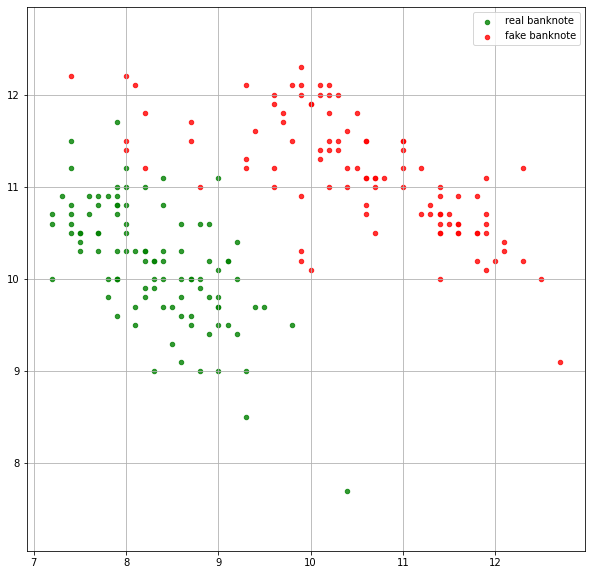

In [38]:
# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here

index_0=np.where(label==0)
index_1=np.where(label==1)

# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red
# Fill X and Y in the plt.scatter 
# Remember to put on grid and legend and equal axis
# Put your code here

index_0=data_xy[index_0]
index_1=data_xy[index_1]
x0,y0,x1,y1=[],[],[],[]
for i in range(len(index_0)):
    x0.append(index_0[i][0])
    y0.append(index_0[i][1])
for i in range(len(index_1)):
    x1.append(index_1[i][0])
    y1.append(index_1[i][1])
plt.figure(figsize = (10, 10))
plt.scatter(x0,y0,s=20, alpha=0.8,c='green')
plt.scatter(x1,y1,s=20, alpha=0.8,c='red')
plt.legend(['real banknote','fake banknote'])#legend
plt.grid()#grid
plt.axis('equal')#equal axis
plt.show

In [5]:
# Use [Numpy function] to calculate the squared distance matrix between each points
# Put your code here np.sum(np.square(data_xy[0]-data_xy[1]))

dist_sq=[]
for i in range(len(data_xy)):
    for j in range(len(data_xy)):
        dist_sq.append(np.sum(np.square(data_xy[i]-data_xy[j])))

In [6]:
dist_sq=np.array(dist_sq).reshape(200,200)
dist_sq

array([[ 0.  ,  0.85,  0.1 , ...,  4.52,  7.09,  4.68],
       [ 0.85,  0.  ,  0.37, ...,  8.81, 12.5 ,  8.41],
       [ 0.1 ,  0.37,  0.  , ...,  5.86,  8.81,  5.86],
       ...,
       [ 4.52,  8.81,  5.86, ...,  0.  ,  0.37,  0.32],
       [ 7.09, 12.5 ,  8.81, ...,  0.37,  0.  ,  1.09],
       [ 4.68,  8.41,  5.86, ...,  0.32,  1.09,  0.  ]])

In [7]:
def nearest_partition(dist_sq, K):
    K_Nearest_Neighbor=[]
    # Use [Numpy function] to return the "K Nearest Neighbor"
    # Put your code here 
    for i in range(len(dist_sq)):
        idx=np.argpartition(dist_sq[i],K)
        K_Nearest_Neighbor.append([idx[0:K+1]])
    return K_Nearest_Neighbor

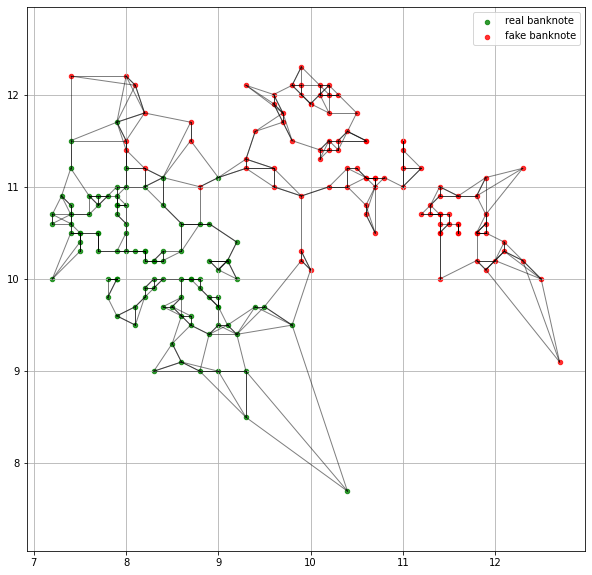

In [39]:
# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here

index_0=np.where(label==0)
index_1=np.where(label==1)

# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red
# Fill X and Y in the plt.scatter
# Remember to put on grid and legend and equal axis
# Put your code here

index_0=data_xy[index_0]
index_1=data_xy[index_1]
x0,y0,x1,y1=[],[],[],[]
for i in range(len(index_0)):
    x0.append(index_0[i][0])
    y0.append(index_0[i][1])
for i in range(len(index_1)):
    x1.append(index_1[i][0])
    y1.append(index_1[i][1])
plt.figure(figsize = (10, 10))
plt.scatter(x0,y0,s=20, alpha=0.8,c='green')
plt.scatter(x1,y1,s=20, alpha=0.8,c='red')
plt.legend(['real banknote','fake banknote'])#legend
plt.grid()#grid
plt.axis('equal')#equal axis
       
# Draw lines from each point to its three nearest neighbors (set K=3)
# Use some zip magic to make it happen (Hint is at below cell)
# You might need loops to generate the plot below
# set parameter [color='black', linewidth=1, alpha=0.5] when you draw lines 
# Put your code here

K=3
y=nearest_partition(dist_sq,K)
x1,point=[],[]
for i in range(len(y)):
    x=np.append(y[i],i)
    x1.append(x)
for i in range(len(x1)):
    x=data_xy[x1[i][0:5]]
    point.append(x)
for k in range(len(point)):
    for j in range(len(point[k])):
        plt.plot(*zip(point[k][4],point[k][j]),color='black',linewidth=1,alpha=0.5)

<function matplotlib.pyplot.show(close=None, block=None)>

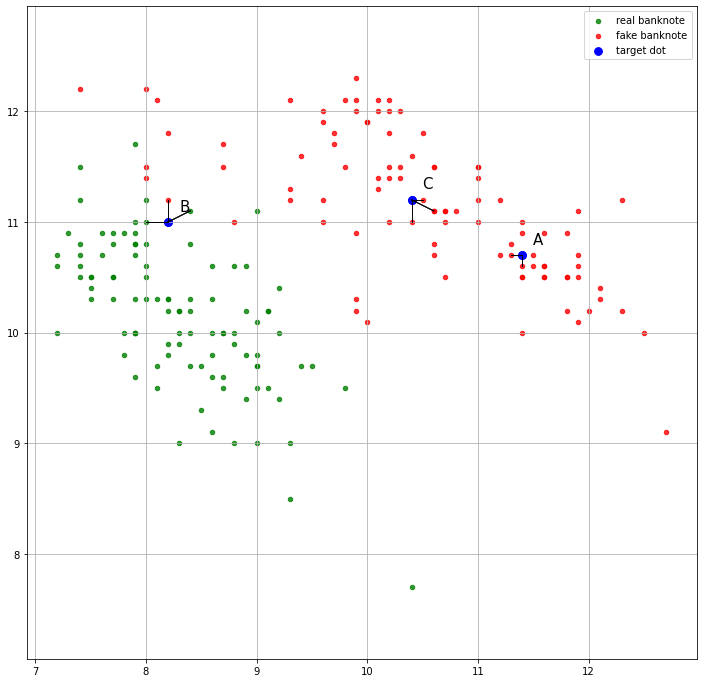

In [40]:
# Set seed = 10 | Random select three dots from data_xy
# Save dots index in varible "target" 
# Don't need to change below three lines

random.seed(10)
target = np.array([random.randint(0, len(data_xy)) for i in range(3)])
text = ['A', 'B', 'C']


# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here

index_0=np.where(label==0)
index_1=np.where(label==1)


# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red | Target → color = blue
# Fill X and Y in the plt.scatter
# Remember to put on grid and legend and equal axis
# Put your code here

index_0=data_xy[index_0]
index_1=data_xy[index_1]
x0,y0,x1,y1,z0,z1,z=[],[],[],[],[],[],[]
for i in range(len(index_0)):
    x0.append(index_0[i][0])
    y0.append(index_0[i][1])
for i in range(len(index_1)):
    x1.append(index_1[i][0])
    y1.append(index_1[i][1])
for i in range(len(target)):
    z.append(data_xy[target[i]])
    z0.append(data_xy[target[i]][0])
    z1.append(data_xy[target[i]][1])
plt.figure(figsize = (12, 12))
plt.scatter(x0,y0,s=20, alpha=0.8,c='green')
plt.scatter(x1,y1,s=20, alpha=0.8,c='red')
plt.scatter(z0,z1,s=60,c='blue') # Target dots
plt.legend(['real banknote','fake banknote','target dot'])#legend
plt.grid()#grid
plt.axis('equal')#equal axis
plt.scatter(z0,z1,s=60,c='blue') # Target dots


# Draw lines from the selected three point to its three nearest neighbors (set K=3)
# Use some zip magic to make it happen (Hint is at below cell)
# You might need loops to generate the plot below
# set parameter [color='black', linewidth=1, alpha=0.5] when you draw lines 
# Put text A, B, C on each dots (location: Right + 0.1、 Up + 0.1)
# Put your code here


K=3
y=nearest_partition(dist_sq,K)
x1,point1=[],[]
for i in range(len(y)):
    x=np.append(y[i],i)
    x1.append(x)
for i in range(len(target)):
    x=data_xy[x1[target[i]][0:5]]
    point1.append(x)
for k in range(len(point1)):
    for i in range(len(point1[k])):
        for j in range(len(point1[k])):
            plt.plot(*zip(point1[k][4],point1[k][j]),color='black',linewidth=1,alpha=0.5)
plt.text(z0[0]+0.1,z1[0]+0.1,'A', size=15, color='black')#location: Right + 0.1、 Up + 0.1
plt.text(z0[1]+0.1,z1[1]+0.1,'B', size=15, color='black')#location: Right + 0.1、 Up + 0.1
plt.text(z0[2]+0.1,z1[2]+0.1,'C', size=15, color='black')#location: Right + 0.1、 Up + 0.1
plt.show

### Question：由上圖進行判斷，回答 ABC 三點各自被 KNN 分為哪一群，並說明原因。

### Your Answer：'A'點和'C'點應被歸類為'fake banknote'，在K=3的條件下，'A'和'C'兩點的三個近鄰點皆歸屬於'fake banknote'，所以'A'點和'C'點應被歸類為'fake banknote'。而'B'點應被歸類為'real banknote'，在K=3的條件下，'B'的三個近鄰點中，有兩個歸屬於'real banknote'，一個歸屬於'fake banknote'，因為2>1，所以'B'點應被歸類為'real banknote'。

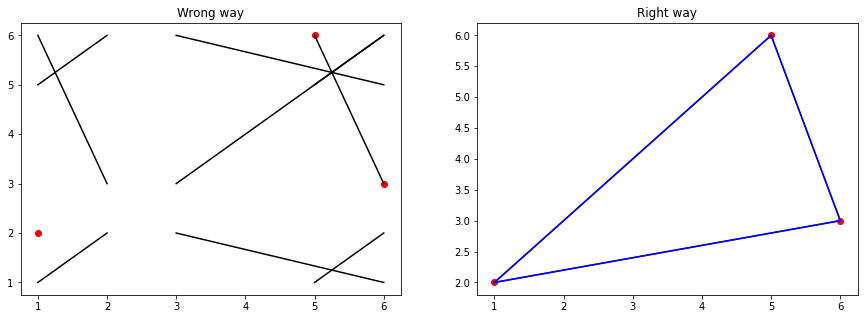

In [241]:
# Hint: How to drow a line between two dots

dots = np.array([[1, 2], [6, 3], [5, 6]])

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('Wrong way')        
for i in range(len(dots)):
    plt.scatter(dots[i][0], dots[i][1], color='red')

for i in range(len(dots)):
    for j in range(len(dots)):
        plt.plot(dots[i], dots[j], color = 'black')

plt.subplot(122)
plt.title('Right way')

for i in range(len(dots)):
    plt.scatter(dots[i][0], dots[i][1], color='red')

for i in range(len(dots)):
    for j in range(len(dots)):
        plt.plot(*zip(dots[i], dots[j]), color = 'blue')